## Dimensionality Reduction

The dimensionality reduction method used in this work is the Uniform Manifold Approximation and Projection (UMAP for short).


Read more about how umap works here: https://umap-learn.readthedocs.io/en/latest/

In [1]:
# import packages
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read csv file and select relevant columns
df = pd.read_csv('dataset_features.csv')
excluded = ["Tc", "compound", "composition",'elements']
X = df.drop(excluded, axis=1)
y = df['Tc'].values

In [3]:
# the 12 features selected (see feature selection notebook and paper for details)
feature0 = "MagpieData mean NsValence"
feature1 = "MagpieData mode NsValence"
feature2 = "a"
feature3 = "MagpieData range MendeleevNumber"
feature4 = "MagpieData avg_dev CovalentRadius"
feature5 = "MagpieData range Electronegativity"
feature6 = "MagpieData mean GSvolume_pa"
feature7 = "MagpieData mean CovalentRadius"
feature8 = "MagpieData avg_dev Number"
feature9 = "MagpieData avg_dev Row"
feature10 = "MagpieData mean Number"
feature11 = "MagpieData range CovalentRadius"

test_features = [feature0, feature1, feature2, feature3, feature4, feature5, feature6,
               feature7, feature8, feature9, feature10, feature11]

X_12 = df[test_features]

In [4]:
# reduce dimensionality to 2 dimensions using umap
embedding_12 = umap.UMAP(n_neighbors=10,min_dist=0.5, random_state=0).fit_transform(X_12)
df['umap_0'] = embedding_12[:,0]
df['umap_1'] = embedding_12[:,1]

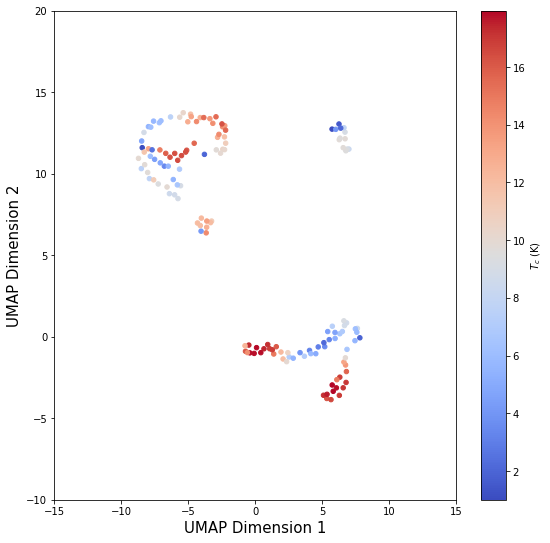

In [5]:
# visualize results, colored by Tc
x, y, z = df['umap_0'], df['umap_1'], df['Tc']
cmap = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(9,9))
points = plt.scatter(x, y, c=z, s=20, cmap=cmap)
plt.xlabel('UMAP Dimension 1', fontsize=15)
plt.ylabel('UMAP Dimension 2', fontsize=15)
cbar = plt.colorbar(points, use_gridspec=True)
cbar.ax.set_ylabel('$T_c$ (K)')
plt.xlim([-15,15])
plt.ylim([-10,20])
plt.show()